# Auto MPG Dataset Exploratory Data Analysis
This notebook walks through:

1. Data Loading and Overview
2. Data Cleaning (Handling Missing Values)
3. Descriptive Statistics
4. Univariate Analysis (Histograms)
5. Bivariate Analysis (Correlation Matrix)
6. Feature Selection
7. Simple Regression Model
8. Simple Regression Model Evaluation
9. Different Model Predictions

In [127]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [128]:
# Load the dataset
df_all = pd.read_csv('./data/auto-mpg.csv', na_values=['?'])
df = df_all.select_dtypes(include=[np.number])

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [129]:
# Check for missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [130]:
# Drop rows with missing values
# Missing data can break algorithms or bias results.
# For simplicity, I've dropped all rows that had any missing entries.
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [131]:
# Data types and basic statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 24.6 KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


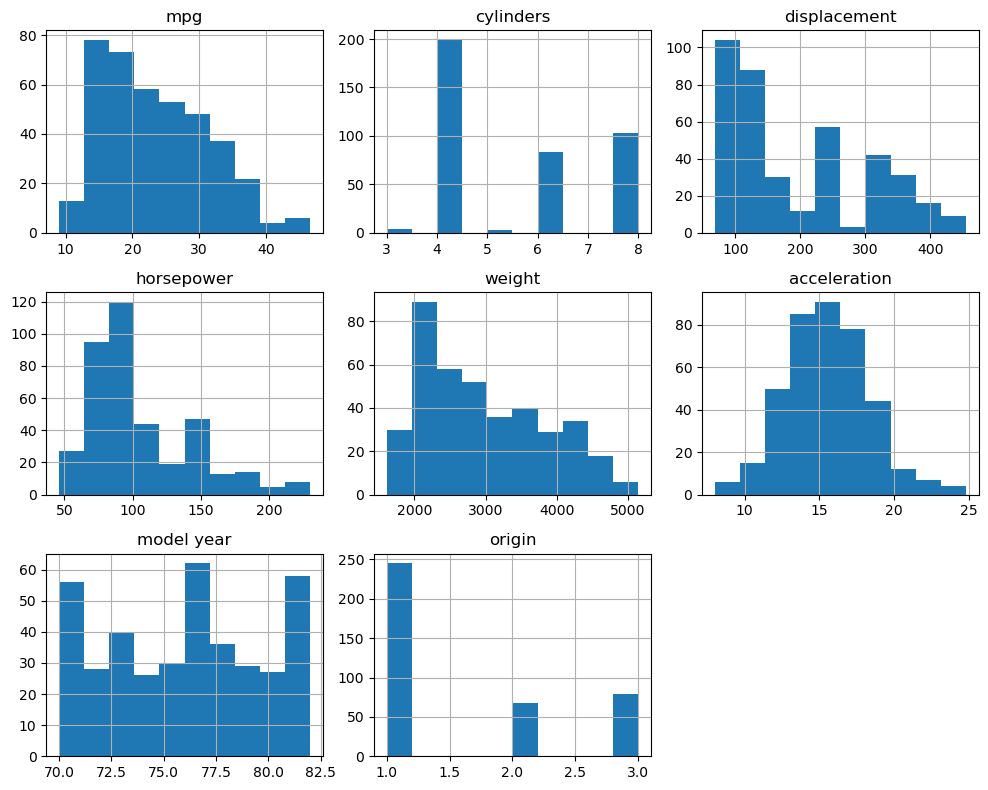

In [132]:
# Histograms for numeric features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

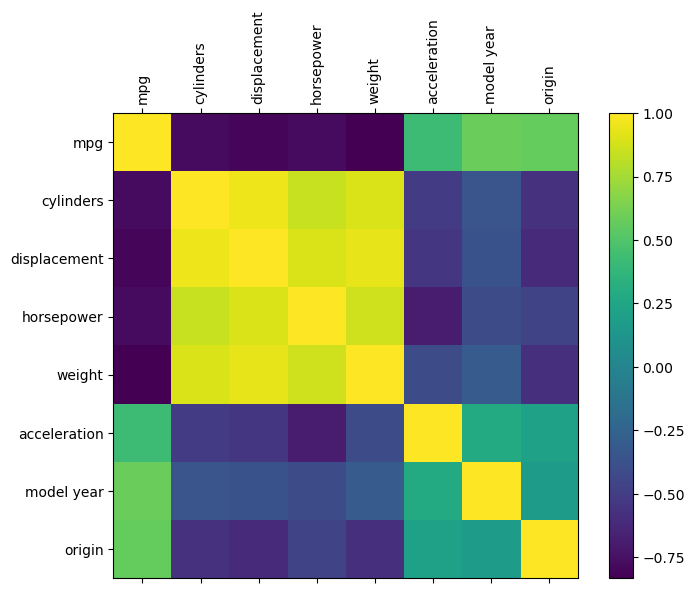

In [133]:
# Correlation matrix heatmap
corr = df.corr()
plt.figure(figsize=(8, 6))
plt.matshow(corr, fignum=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

## Feature Selection Based on Correlation with 'mpg'

In [134]:
# Select top 5 features most correlated with mpg, higher or lower features had worst results
corr_with_mpg = corr['mpg'].abs().sort_values(ascending=False)
selected_features = list(corr_with_mpg.index[1:6])  # top 5 excluding 'mpg'
selected_features

['weight', 'displacement', 'horsepower', 'cylinders', 'model year']

In [135]:
#Selected features: 'weight', 'displacement', 'horsepower', 'cylinders', 'model year'
X = df[selected_features]
y = df['mpg']

## Simple Linear Regression

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
preds = linreg_model.predict(X_test)

In [152]:
#Mean Squared Error
linreg_model_mse = mean_squared_error(y_test, preds)
linreg_model_rmse = np.sqrt(linreg_model_mse)
print(f"Test MSE: {linreg_model_rmse:.2f}")

Test MSE: 3.96


In [146]:
i = 8
print("Features:\n", X_test.iloc[i])
print("Actual mpg:", y_test.iloc[i])

pred = model.predict(X_test.iloc[[i]])
print("Predicted mpg:", pred)

Features:
 weight          3264.0
displacement     225.0
horsepower        95.0
cylinders          6.0
model year        75.0
Name: 150, dtype: float64
Actual mpg: 19.0
Predicted mpg: [20.94303897]


## Predict a new set of values

In [147]:
#selected_features -> 'weight', 'displacement', 'horsepower', 'cylinders', 'model year'
new_car = pd.DataFrame(
    [[1500, 100, 125, 4, 99]],
    columns=selected_features
)

print("Columns used by model:", linreg_model.feature_names_in_)
print("Columns in new data:  ", new_car.columns.tolist())

pred_new = model.predict(new_car)
print("Predicted mpg:", pred_new[0])


Columns used by model: ['weight' 'displacement' 'horsepower' 'cylinders' 'model year']
Columns in new data:   ['weight', 'displacement', 'horsepower', 'cylinders', 'model year']
Predicted mpg: 50.2998942940916


## Test With Other Models

In [149]:
#linreg_model already loaded before
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=7,
                                 random_state=42, n_jobs=-1)
gbr_model = GradientBoostingRegressor(n_estimators=200,
                                      learning_rate=0.1,
                                      max_depth=3,
                                      random_state=42)
svr_pipeline = make_pipeline(StandardScaler(),
                             SVR(kernel='rbf', C=10, epsilon=0.2))
knn_model = KNeighborsRegressor(n_neighbors=5)
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50),
                         activation='relu',
                         solver='adam',
                         max_iter=500,
                         random_state=42)

models = [tree_model, rf_model, gbr_model, svr_pipeline, knn_model, mlp_model]
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR', 'k-Nearest Neighbors',
               'MLP Regressor']

In [158]:
print(f"Linear Regression    → Test RMSE: {linreg_model_rmse:.2f} mpg")

for name, mdl in zip(model_names, models):
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name:20s} → Test RMSE: {rmse:.2f} mpg")

Linear Regression    → Test RMSE: 3.96 mpg
Decision Tree        → Test RMSE: 3.57 mpg
Random Forest        → Test RMSE: 2.55 mpg
Gradient Boosting    → Test RMSE: 2.60 mpg
SVR                  → Test RMSE: 2.39 mpg
k-Nearest Neighbors  → Test RMSE: 4.18 mpg
MLP Regressor        → Test RMSE: 3.96 mpg


## Test a single sample

In [163]:
i = 5
X_single = X_test.iloc[[i]]  # keep as DataFrame
y_true = y_test.iloc[i]

print(f"\n--- Inspecting test sample index {i} ---")
print("Feature values:", X_single.to_dict(orient='records')[0])
print(f"True mpg: {y_true:.2f}\n")

pred = linreg_model.predict(X_single)[0]
print(f"Linear Regression    → Predicted mpg = {pred:.2f}")
for name, mdl in zip(model_names, models):
    pred = mdl.predict(X_single)[0]
    print(f"{name:20s} → Predicted mpg = {pred:.2f}")


--- Inspecting test sample index 5 ---
Feature values: {'weight': 2155, 'displacement': 97.0, 'horsepower': 75.0, 'cylinders': 4, 'model year': 76}
True mpg: 28.00

Linear Regression    → Predicted mpg = 29.09
Decision Tree        → Predicted mpg = 25.83
Random Forest        → Predicted mpg = 27.31
Gradient Boosting    → Predicted mpg = 27.07
SVR                  → Predicted mpg = 29.54
k-Nearest Neighbors  → Predicted mpg = 33.96
MLP Regressor        → Predicted mpg = 28.29
